In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

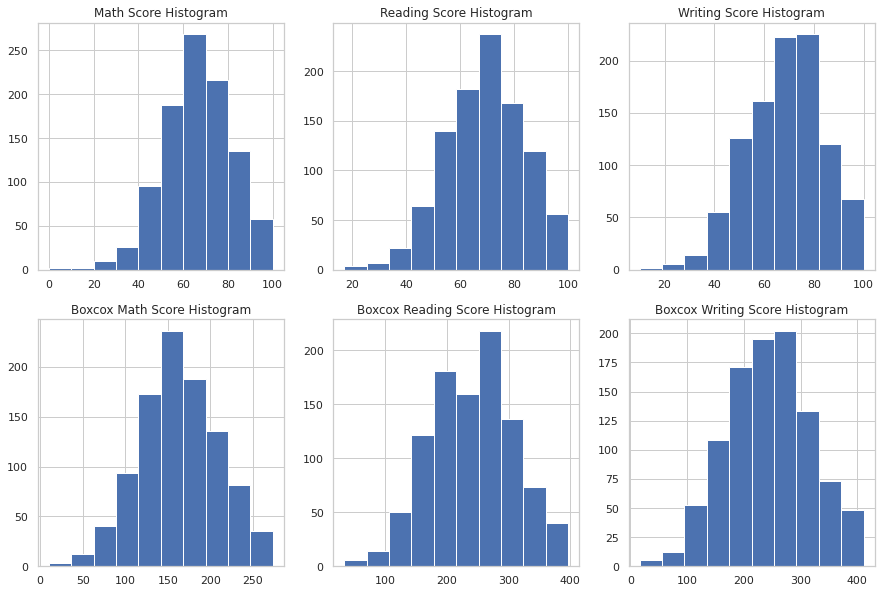

In [30]:
# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.hist(student_df['math score'])
plt.title('Math Score Histogram')

plt.subplot(2, 3, 2)
plt.hist(student_df['reading score'])
plt.title('Reading Score Histogram')

plt.subplot(2, 3, 3)
plt.hist(student_df['writing score'])
plt.title('Writing Score Histogram')

plt.subplot(2, 3, 4)
math_box,_ = boxcox(student_df[student_df['math score'] > 0]['math score'])
plt.hist(math_box)
plt.title('Boxcox Math Score Histogram')

plt.subplot(2, 3, 5)
reading_box,_ = boxcox(student_df['reading score'])
plt.hist(reading_box)
plt.title('Boxcox Reading Score Histogram')

plt.subplot(2, 3, 6)
writing_box,_ = boxcox(student_df['writing score'])
plt.hist(writing_box)
plt.title('Boxcox Writing Score Histogram')

plt.show()

# They do not appear to be normally distributed. The Boxcox slightly moves the data closer to normal from their original 
# left skew appearance

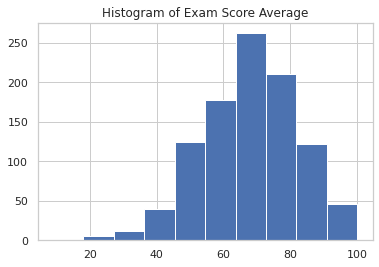

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


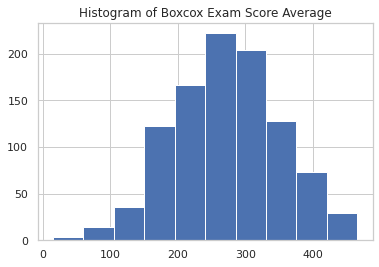

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.2959101356398447
Normality test statistics is 15.186721327231322 and p value is 0.24909303914726724


In [34]:
# 2. Say you want to use a single variable for the exam scores as your target. For this purpose, create a new variable
# by taking an average of the exam scores. Check whether this new variable is normally distributed. If it's not normally
# distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

exam_score_avg = (student_df["math score"] +
                  student_df["reading score"] + 
                  student_df["writing score"]) / 3

plt.hist(exam_score_avg)
plt.title("Histogram of Exam Score Average")
plt.show()

jb_stats = jarque_bera(exam_score_avg)
norm_stats = normaltest(exam_score_avg)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

exam_score_avg_box,_ = boxcox(exam_score_avg)

plt.hist(exam_score_avg_box)
plt.title("Histogram of Boxcox Exam Score Average")
plt.show()

jb_stats_box = jarque_bera(exam_score_avg_box)
norm_stats_box = normaltest(exam_score_avg_box)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats_box[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats_box[1]))

# After the boxcox the data is normally distributed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   object  
 1   race/ethnicity               1000 non-null   object  
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   object  
 4   test preparation course      1000 non-null   object  
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
 8   exam_score_avg               1000 non-null   float64 
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 63.8+ KB


Text(0.5, 1.0, 'Exam Score Average and Test Preparation Course')

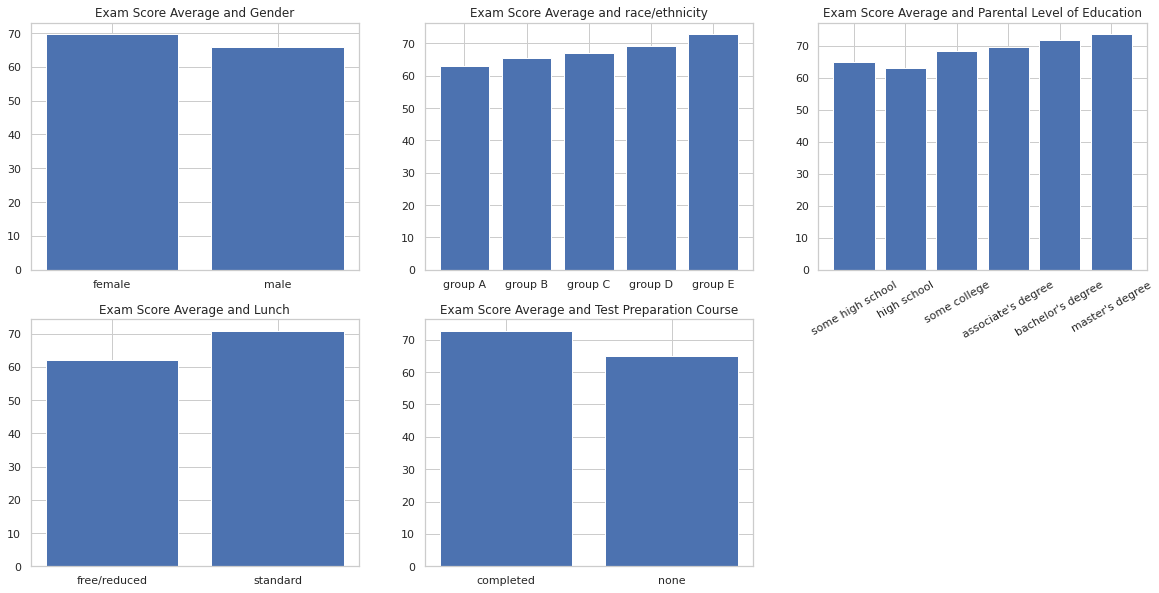

In [55]:
# 3. Which variables seem related to the target variable (the newly created variable from the previous question)? If your
# goal is to explain the determinants of success in exams, which variables in your dataset might be useful?

student_df.info()
order_data = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
student_df['parental level of education'] = student_df['parental level of education'].astype('category')
student_df['parental level of education'].cat.reorder_categories(order_data, inplace= True)

student_df["exam_score_avg"] = exam_score_avg

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.bar(student_df.groupby("gender")["exam_score_avg"].mean().index,
        student_df.groupby("gender")["exam_score_avg"].mean())
plt.title("Exam Score Average and Gender")

plt.subplot(2, 3, 2)
plt.bar(student_df.groupby("race/ethnicity")["exam_score_avg"].mean().index, 
        student_df.groupby("race/ethnicity")["exam_score_avg"].mean())
plt.title("Exam Score Average and race/ethnicity")

plt.subplot(2, 3, 3)
plt.bar(student_df.groupby("parental level of education")["exam_score_avg"].mean().index, 
        student_df.groupby("parental level of education")["exam_score_avg"].mean())
plt.title("Exam Score Average and Parental Level of Education")
plt.xticks(rotation = 30)

plt.subplot(2, 3, 4)
plt.bar(student_df.groupby("lunch")["exam_score_avg"].mean().index, 
        student_df.groupby("lunch")["exam_score_avg"].mean())
plt.title("Exam Score Average and Lunch")

plt.subplot(2, 3, 5)
plt.bar(student_df.groupby("test preparation course")["exam_score_avg"].mean().index, 
        student_df.groupby("test preparation course")["exam_score_avg"].mean())
plt.title("Exam Score Average and Test Preparation Course")

# Results

# Race/Ethnicity: Score increases with each group so there's likely some 
# relevance here.

# Parent Education: Scores also have a general upwards trend as parent education 
# increases. 

# Gender, Lunch, Test Prep: Scores are higher females, those without free lunch,
# and those who completed test prep.
